In [1]:
import sys
sys.path.append("src")


import random

import logging
logging.basicConfig(format='%(filename)s: '
                           '%(levelname)s: '
                           '%(funcName)s(): \t'
#                            '%(lineno)d:\t'
                           '%(message)s')
from absl import flags
import tensorflow as tf

log = logging.getLogger('tensorflow')
log.setLevel('INFO')

import numpy as np
import matplotlib
matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm

In [18]:
def make_model(model_dir, reconstruction_loss, use_encoder, encoder, number_of_gaussians, ax):
    model_dir = '{}/NG_{}'.format(model_dir, number_of_gaussians)

    log.setLevel('INFO')
    data_dir = ''
    dataset = 'TOY'
    noise_dim= 1

    # GENERIC PARAMS
    batch_size= 64
    d_optimizer= 'ADAM'

#     reconstruction_loss= True
#     use_encoder= True

    e_loss_lambda= 0.0
    e_optimizer= 'ADAM'
#     encoder= 'ATTACHED'
    eval_loss= True
    g_optimizer= 'ADAM'
    soft_label = 0

    window_lambda = 0
    use_wgan = 0
    gcp_project= None
    iterations_per_loop= 500
    lambda_window= 0
    learning_rate= 0.0002
    noise_cov= 'IDENTITY'
    num_eval_images= 1024
    num_shards= None
    num_viz_images= 100
    tpu= ''
    tpu_zone= 'us-central1-f'
    train_steps_per_eval= 1000
    use_tpu= False
    use_window_loss= False
    wgan_lambda= 10.0
    wgan_n= 5
    wgan_penalty= False

    ignore_params_check = False

    from model import ToyModel as Model
    from datamanager.toydist_input_functions import generate_input_fn


#     try:
#         import shutil
#         shutil.rmtree(model_dir)
#     except FileNotFoundError:
#         print('Folder {model_dir} does not exist')

    ##### START
    model = Model(number_of_gaussians=3,
                model_dir=model_dir, data_dir=data_dir, dataset=dataset,
                # Model parameters
                learning_rate=learning_rate, batch_size=batch_size, noise_dim=noise_dim,
                noise_cov=noise_cov, soft_label_strength=soft_label,
                use_window_loss=use_window_loss, lambda_window=window_lambda,
                # WGAN
                use_wgan_penalty=use_wgan, wgan_lambda=wgan_lambda, wgan_n=wgan_n,
                # Encoder
                use_encoder=use_encoder, encoder=encoder, e_loss_lambda=e_loss_lambda,
                # ¯\_(ツ)_/¯
                reconstruction_loss=reconstruction_loss,
                # Optimizers
                g_optimizer=g_optimizer, d_optimizer=d_optimizer, e_optimizer=e_optimizer,
                # Training and prediction settings
                iterations_per_loop=iterations_per_loop, num_viz_images=num_viz_images,
                # Evaluation settings
                eval_loss=eval_loss, train_steps_per_eval=train_steps_per_eval,
                num_eval_images=num_eval_images,
                # TPU settings
                use_tpu=use_tpu, tpu=tpu, tpu_zone=tpu_zone,
                gcp_project=gcp_project, num_shards=num_shards,
                ignore_params_check=ignore_params_check)
    model.build_model()
    model.train(8000, generate_input_fn)
    log.setLevel('ERROR')


#     def get_sample(z):
#         def _input_fn(params):
#              return {'random_noise':
#                 tf.constant(z, dtype=tf.float32)} #np.random.uniform(0,1)] #,np.random.uniform(0,1)] 
#                                  #for i in range(batch_size)], dtype=tf.float32)}

#         return next(model.est.predict(_input_fn))['generated_images']

#     z = np.array([[np.random.uniform(0,1)] for i in range(1*100)])
#     z = z.reshape([-1, 1, 1])
#     samples = [get_sample(z[i, : , :]) for i in range(1*100)]
#     samples = np.vstack(samples)
#     z = z.flatten()
    # tf.logging.error('z: {} sample:{}'.format(z, samples))

    def get_samples(sz):
        def _input_fn(params):
             return {'random_noise':
                tf.constant(z, dtype=tf.float32)} #np.random.uniform(0,1)] #,np.random.uniform(0,1)] 
                             #for i in range(batch_size)], dtype=tf.float32)}

        gen = model.est.predict(_input_fn)
        out = [next(gen)['generated_images'] for z in range(len(sz))]
        return out

    z = np.array([[np.random.uniform(np.zeros(noise_dim),1)] for i in range(1000)])
    samples = np.vstack(get_samples(z))
    z = np.squeeze(z)
    
    

    def sample_toy_distr():
        x = np.random.normal(0, 0.1)
        y = np.random.normal(0, 0.1)
        # centers = [(0,-1), (1,0), (-0.5,0.5)]
        centers = np.vstack([[i,j] for i in range(number_of_gaussians) for j in range(number_of_gaussians)])
        centers = centers - np.mean(centers, axis=0)

        center = np.random.randint(0, number_of_gaussians)
        mu_x, mu_y = centers[center]
        return [x + mu_x, y + mu_y]

    r_samples = [sample_toy_distr() for i in tqdm(np.linspace(-1, 1,10000))]
    r_samples = np.vstack(r_samples)

    plt.figure(figsize=(20,12))
    plt.scatter(r_samples[:,0], r_samples[:,1], label='true dist')
    plt.scatter(samples[:,0], samples[:,1], c=z, label='GAN')
    plt.legend()
    plt.savefig(model_dir + 'final_output.png')

    ax.scatter(r_samples[:,0], r_samples[:,1], c='red', label='true dist')
    ax.scatter(samples[:,0], samples[:,1], c=z, label='GAN')
    # ax.legend()

    return model

tf_logging.py: INFO: info(): 	Current parameters: {'batch_size': 64,
 'd_optimizer': 'ADAM',
 'data_dir': '',
 'dataset': 'TOY',
 'e_loss_lambda': 0.0,
 'e_optimizer': 'ADAM',
 'encoder': 'ATTACHED',
 'eval_loss': True,
 'g_optimizer': 'ADAM',
 'gcp_project': None,
 'iterations_per_loop': 500,
 'lambda_window': 0,
 'learning_rate': 0.0002,
 'model_dir': 'model_out/vanilla/NG_1/ToyModel_z1_AAA_lr0.0002',
 'noise_cov': 'IDENTITY',
 'noise_dim': 1,
 'num_eval_images': 1024,
 'num_shards': None,
 'num_viz_images': 100,
 'number_of_gaussians': 3,
 'reconstruction_loss': False,
 'soft_label_strength': 0,
 'tpu': '',
 'tpu_zone': 'us-central1-f',
 'train_steps_per_eval': 1000,
 'use_encoder': False,
 'use_tpu': False,
 'use_window_loss': False,
 'wgan_lambda': 10.0,
 'wgan_n': 5,
 'wgan_penalty': 0}
tf_logging.py: INFO: info(): 	Older params file exists.
tf_logging.py: INFO: info(): 	Start
tf_logging.py: INFO: info(): 	Using config: {'_model_dir': 'model_out/vanilla/NG_1/ToyModel_z1_AAA_lr0.0

(1000, 2)
(1000,)


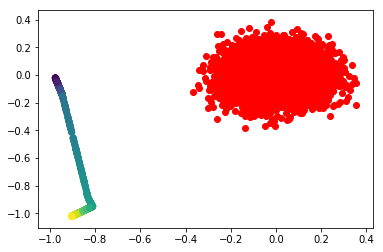

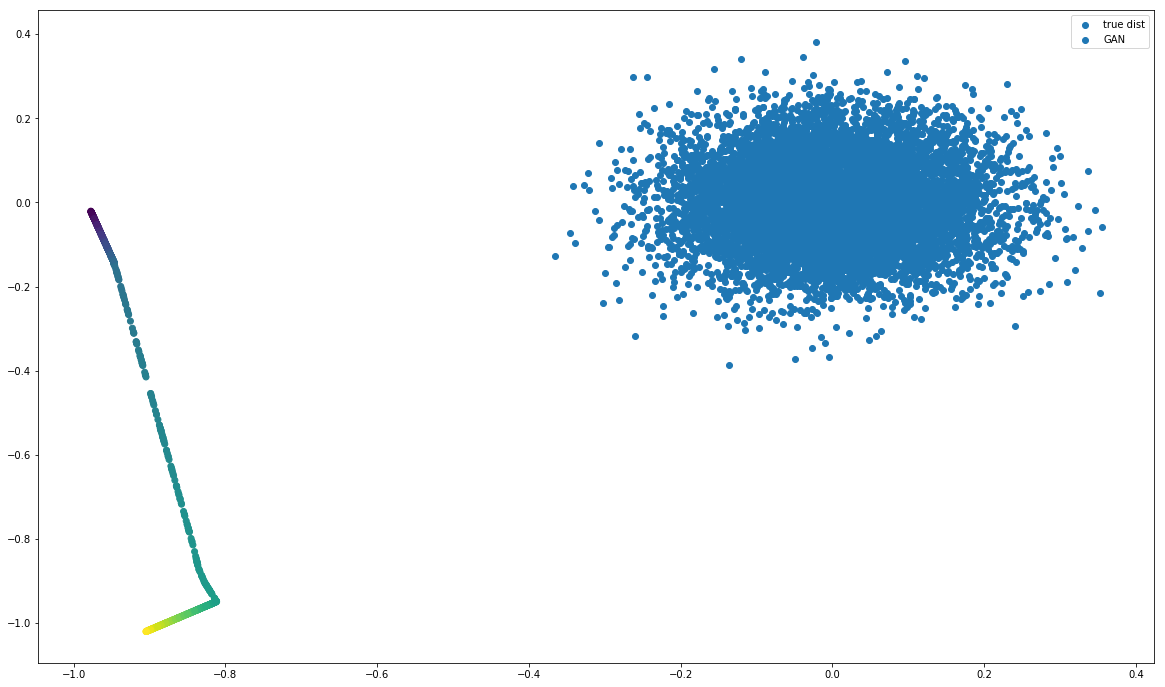

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
vanilla = make_model('model_out/vanilla', False, False, 'ATTACHED', 1, ax)
# encoder = make_model('model_out/encoder_attached', False, True, 'ATTACHED')
# encoder_i = make_model('model_out/encoder_indep', False, True, 'INDEPENDENT')
# reconstruct = make_model('model_out/reconstruction_attached', True, True, 'ATTACHED')
# reconstruct_i = make_model('model_out/reconstruction_indep', True, True, 'INDEPENDENT')




In [ ]:
def get_sample(batch_size):
    def _input_fn(params):
         return {'random_noise':
            tf.constant([[np.random.uniform(0,1)] #,np.random.uniform(0,1)] 
                             for i in range(batch_size)], dtype=tf.float32)}

    return next(vanilla.est.predict(_input_fn))['generated_images']

samples = [get_sample(64) for i in tqdm(np.linspace(-1, 1,100))]
samples = np.vstack(samples)

In [ ]:
# import tensorflow as tf
# import numpy as np
# import matplotlib
# matplotlib.use('TkAgg')
# %matplotlib inline


# def get_sample(batch_size):
#     def _input_fn(params):
#          return {'random_noise':
#             tf.constant([[np.random.uniform(0,1)] #,np.random.uniform(0,1)] 
#                              for i in range(batch_size)], dtype=tf.float32)}

#     return next(vanilla.est.predict(_input_fn))['generated_images']

# samples = [get_sample(64) for i in tqdm(np.linspace(-1, 1,100))]
# samples = np.vstack(samples)

# NUMBER_OF_GAUSSIANS=2
# def sample_toy_distr():
#     x = np.random.normal(0, 0.1)
#     y = np.random.normal(0, 0.1)
# #     centers = [(i*5,j*10) for i in range(NUMBER_OF_GAUSSIANS) for j in range(NUMBER_OF_GAUSSIANS)]
#     centers = [(0,-1), (1,0), (-0.5,0.5)]
#     mu_x, mu_y = random.sample(centers,1)[0]
#     return [x + mu_x, y + mu_y]

# r_samples = [sample_toy_distr() for i in tqdm(np.linspace(-1, 1, 10000))]
# r_samples = np.vstack(r_samples)

# plt.figure(figsize=(20,12))
# plt.scatter(r_samples[:,0], r_samples[:,1], label='true dist')
# plt.scatter(samples[:,0], samples[:,1], c='r', label='GAN');
# plt.legend()
# plt.show()


ioloop.py: ERROR: handle_callback_exception(): 	Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x7f3f299ecbf8>)
Traceback (most recent call last):
  File "/home/nil/Apps/Anaconda/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/nil/Apps/Anaconda/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/nil/Apps/Anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 306, in advance_eventloop
    eventloop(self)
TypeError: 'NoneType' object is not callable
